In [3]:
import PyPDF2 as pdf2
import json
import pandas as pd
import numpy as np
from tabula import read_pdf
from tabulate import tabulate
import matplotlib.pyplot as plt
import folium
import geopandas as gpd

dataPath = "../data/"


c:\Users\Herbert\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [47]:
'''
WIC Data
'''
fileName = "keydata-october-2022.pdf"
pdf = open(dataPath+fileName,'rb')
pdfReader = pdf2.PdfReader(pdf)

for i in range(len(pdfReader.pages)):
    pageNum = i
    pageObj = pdfReader.pages[pageNum]

    with open("./WIC/page" + str(pageNum) + "txt", "w") as f:
        
        f.write(pageObj.extract_text())

    f.close()

# with open("source page" + str(pageNum), "w") as f:
    
#     f.write(pageObj.get_contents.decode("utf-8"))

# f.close()



  SHORTNAME  FID    WHITE   BLACK   AIAN    ASIAN   HPI   OTHER  Shape__Area
1        D2  2.0  53120.0  4520.0  269.0  13604.0  55.0  4893.0     0.001969
[1.0 44656.0 3637.0 783.0 5080.0 50.0 20935.0 0.0029850570322196]
[2.0 53120.0 4520.0 269.0 13604.0 55.0 4893.0 0.001968731256511]
[3.0 29284.0 14990.0 492.0 13190.0 45.0 9927.0 0.0110066903946517]
[4.0 10515.0 40030.0 653.0 3093.0 44.0 11569.0 0.0013236215525012]
[5.0 20392.0 35584.0 475.0 2022.0 42.0 12727.0 0.0022998905149052]
[6.0 48416.0 8694.0 516.0 7271.0 47.0 9359.0 0.0027128071353672]
[7.0 18740.0 28006.0 519.0 6565.0 60.0 12825.0 0.0009894554646052]
[8.0 47430.0 5493.0 332.0 16405.0 54.0 5626.0 0.000802711510687]
[9.0 45548.0 4457.0 486.0 15390.0 71.0 7577.0 0.0012630510964299]


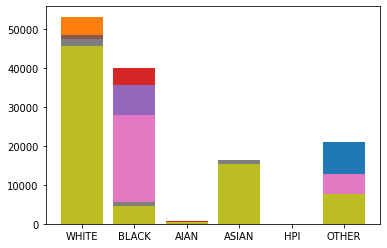

['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9']


In [17]:
'''
Shapefile
This dataset describes the population of the district respect to race.
'''
import pandas as pd

districtPop = pd.read_csv(dataPath + "Shapefile.csv")
col = ['FID','LONGNAME', 'SHORTNAME','DISTRICT', 'COLOR',
 'TOTAL',
 'TARGET_DEV',
 'TARGET_D_1',
 'TOTAL18',
 'TOTALHISP',
 'TOTALNH',
 'WHITENH',
 'BLACKNH',
 'AIANNH',
 'ASIANNH',
 'HPINH',
 'OTHERNH',
 'MLTMNNH',
 'HISP18',
 'NONHISP18',
 'WHITENH18',
 'BLACKNH18',
 'AIANNH18',
 'ASIANNH18',
 'HPINH18',
 'OTHERNH18',
 'MLTMNNH18',
 'WHITE','BLACK','AIAN', 'ASIAN','HPI','OTHER',
 'MLTMN',
 'Shape__Area',
 'Shape__Length',
 'DistrictText']
cols = ['SHORTNAME','FID','WHITE','BLACK','AIAN', 'ASIAN','HPI','OTHER', 'Shape__Area']
districtPop = districtPop[cols]
for colName in cols[1:]:
    districtPop[colName] = districtPop[colName].astype(float) 
# print(districtPop.head)
numDistrict = len(districtPop["SHORTNAME"])

fig, ax = plt.subplots()
y = []
sizes = []
labels = []
print((districtPop.loc[districtPop['FID'] == 2]))
for i in range(numDistrict):
    # print(districtPop)
    y=districtPop.loc[districtPop['FID'] == i+1]
    y=np.array(y)
    print(y[0][1:])
    
    ave = np.average(y[0][2:-1])
    ax.bar(cols[2:-1], y[0][2:-1])
    
    temp = []
    for j in y[0][2:-1]:
        temp.append(j/ave)
    sizes.append(temp)
    labels.append(y[0][0])

plt.show()
print(labels)

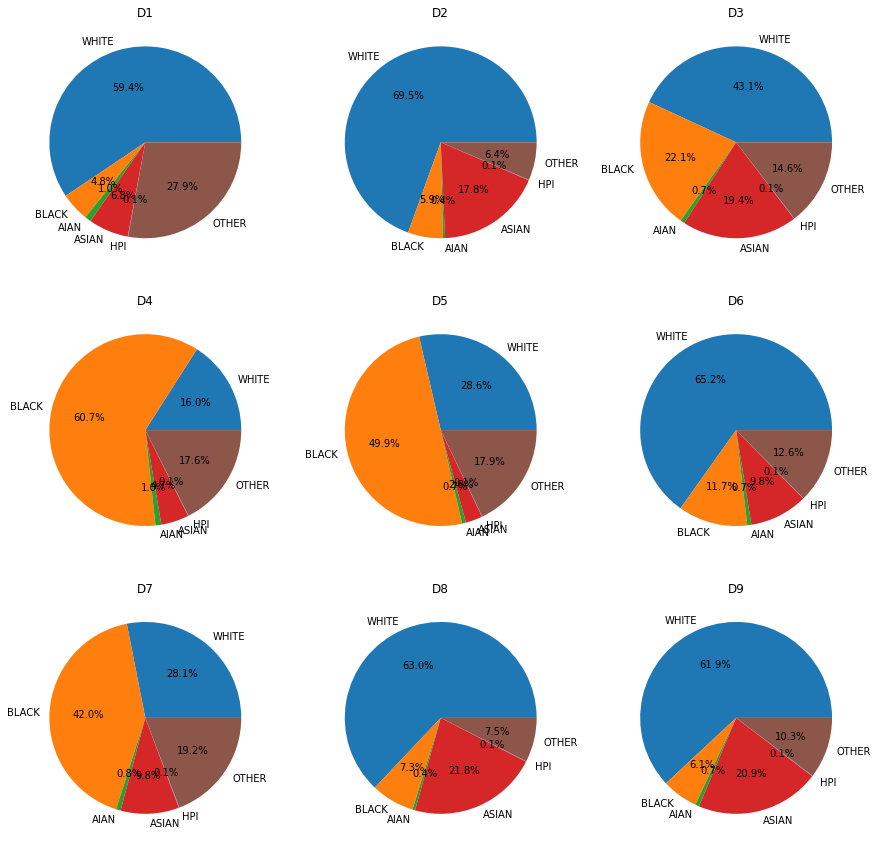

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3,3)
fig.set_figheight(15)
fig.set_figwidth(15)
counter = 0
# print(len(sizes[0]), len(labels))
for i in range(3):
    for j in range(3):
        ax[i,j].pie(sizes[counter], labels=cols[2:-1], autopct='%1.1f%%')
        ax[i,j].set_title(labels[counter])
        counter += 1
plt.show()


We got some useful race distribution data for each district provided by Boston City Council. There are some benefits and some limitations with this result. 
Benefits: 
- The benefits that we get from this dataset is that we can clearly see the distribution and exact number of each race from each districts. From that information, combinging with the information we get from other datasets, such as the aid given to each zipcode area, we are able to tell which group of people need more help compare to others. Then we are able to filter out where and how much aid in the future we will provide to each district/community/group of people.
Drawbacks:
- the Drawbacks we have is that the districts are not identically drawn with zipcode. Which means the boundarys between the two are not exacty the same, and we need to map zipcodes to the approperate districts for the benefits of this dataset to work. We do not yet know how important this dataset is, spend effort on this task might not be a choice before we understand how important this dataset is. 


In [99]:
shapefile = gpd.read_file(dataPath+ "City_Council_Districts_-_Effective_for_the_2023_Municipal_Election.shp")
print(shapefile)

   FID    LONGNAME SHORTNAME  DISTRICT       COLOR  TOTAL  TARGET_DEV  \
0    1  District 1        D1         1  -851848832  76830        1758   
1    2  District 2        D2         2   465990528  77466        2394   
2    3  District 3        D3         3   494969216  73285       -1787   
3    4  District 4        D4         4      -65408  72917       -2155   
4    5  District 5        D5         5   412292224  75436         364   
5    6  District 6        D6         6  1971620992  76523        1451   
6    7  District 7        D7         7  1946148736  72147       -2925   
7    8  District 8        D8         8   639511936  76370        1298   
8    9  District 9        D9         9  -119742707  74673        -399   

   TARGET_D_1  TOTAL18  TOTALHISP  ...  BLACK  AIAN  ASIAN  HPI  OTHER  MLTMN  \
0        2.34    64257      24552  ...   3637   783   5080   50  20935   1689   
1        3.19    70183       6640  ...   4520   269  13604   55   4893   1005   
2       -2.38    60834    

In [89]:
name = "DTA_ZIPCODE_Report_DEC_2022.v2.xlsx - Reported Month Caseload Data .csv"
supplyWZipcode = pd.read_csv(dataPath + name)
filtered = supplyWZipcode.loc[supplyWZipcode["CITY"] == "BOSTON", ["AU_PGM_CD", "ZIP_CODE","CASES","CLIENTS"]]
# filtered["ZIP_CODE"] = filtered["ZIP_CODE"].astype(int) 
filtered["CASES"] = filtered["CASES"].fillna('0')
filtered["CASES"] = [(lambda x: int("".join(x.split(","))))(i) for i in filtered["CASES"]]
filtered["CLIENTS"] = filtered["CLIENTS"].fillna('0')
filtered["CLIENTS"] = [(lambda x: int("".join(x.split(","))))(i) for i in filtered["CLIENTS"]]
filtered


,AU_PGM_CD,ZIP_CODE,CASES,CLIENTS
46,EAEDC,2108,15,15
47,EAEDC,2109,0,0
48,EAEDC,2110,0,0
49,EAEDC,2111,62,62
50,EAEDC,2113,0,0
...,...,...,...,...
2480,TAFDC,2130,0,0
2481,TAFDC,2131,0,16
2482,TAFDC,2132,0,0
2483,TAFDC,2135,0,13


C:\Users\Herbert\AppData\Local\Temp\ipykernel_47524\2559863260.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  casesForZipcode = filtered.groupby("ZIP_CODE")["CASES","CLIENTS"]


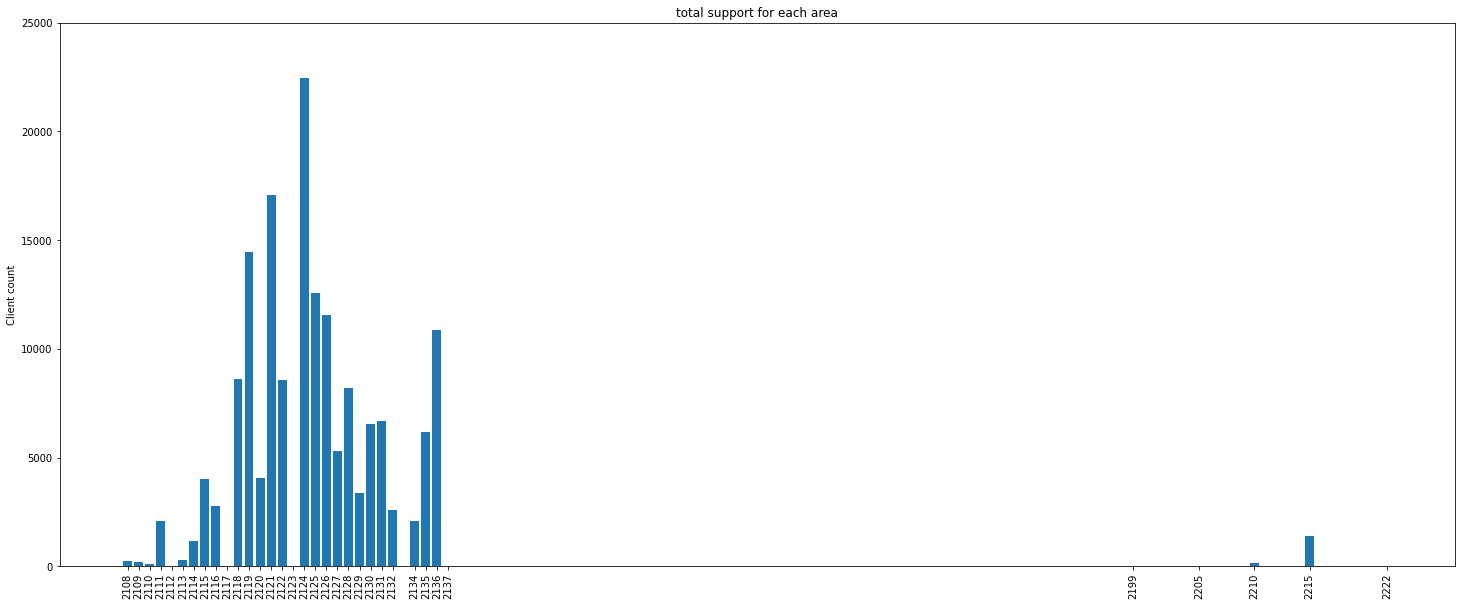

In [93]:
import matplotlib.pyplot as plt
def printer_func(x):
    print(x)
    return x
# print(filtered.groupby("ZIP_CODE").apply(printer_func))


casesForZipcode = filtered.groupby("ZIP_CODE")["CASES","CLIENTS"]
fig, ax1 = plt.subplots()
fig.set_size_inches(25,10)

labels = list(casesForZipcode.groups.keys())
ax1.bar(labels,casesForZipcode.sum()["CLIENTS"])
ax1.set_xticks(labels)
ax1.set_xticklabels(labels= labels ,rotation = 90)
ax1.set_ylim(0,25000)
ax1.set_title("total support for each area")
ax1.set_ylabel("Client count")



plt.show()
casesForZipcode

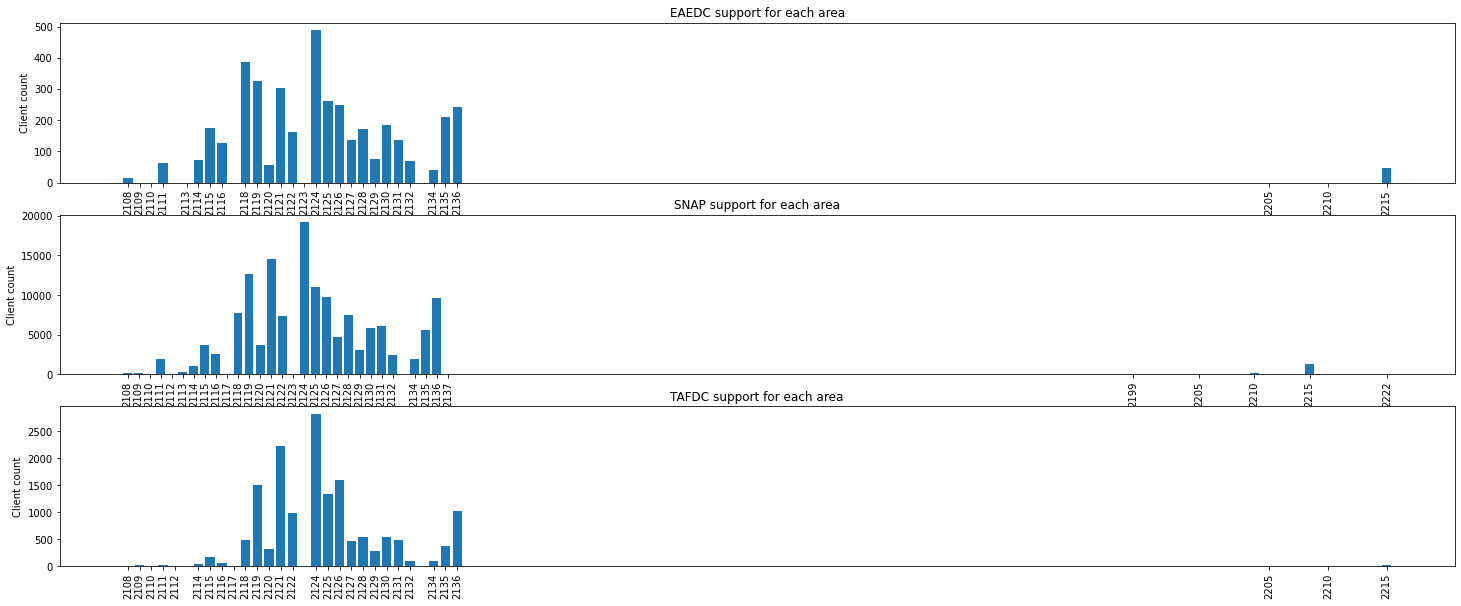

In [98]:
EAEDC_data = filtered.loc[filtered["AU_PGM_CD"]=="EAEDC", ["ZIP_CODE","CLIENTS"]]
SNAP_data = filtered.loc[filtered["AU_PGM_CD"]=="SNAP",["ZIP_CODE","CLIENTS"]]
TAFDC_data = filtered.loc[filtered["AU_PGM_CD"]=="TAFDC",["ZIP_CODE","CLIENTS"]]

EAEDC_data = EAEDC_data.groupby("ZIP_CODE")["CLIENTS"]
EAEDC_labels = list(EAEDC_data.groups.keys())

SNAP_data = SNAP_data.groupby("ZIP_CODE")["CLIENTS"]
SNAP_labels = list(SNAP_data.groups.keys())

TAFDC_data = TAFDC_data.groupby("ZIP_CODE")["CLIENTS"]
TAFDC_labels = list(TAFDC_data.groups.keys())

fig, (ax1,ax2,ax3) = plt.subplots(3,1)
fig.set_size_inches(25,10)

ax1.bar(EAEDC_labels,EAEDC_data.sum())
ax1.set_xticks(EAEDC_labels)
ax1.set_xticklabels(labels= EAEDC_labels ,rotation = 90)
ax1.set_title("EAEDC support for each area")
ax1.set_ylabel("Client count")

ax2.bar(SNAP_labels,SNAP_data.sum())
ax2.set_xticks(SNAP_labels)
ax2.set_xticklabels(labels= SNAP_labels ,rotation = 90)
ax2.set_title("SNAP support for each area")
ax2.set_ylabel("Client count")


ax3.bar(TAFDC_labels,TAFDC_data.sum())
ax3.set_xticks(TAFDC_labels)
ax3.set_xticklabels(labels= TAFDC_labels ,rotation = 90)
ax3.set_title("TAFDC support for each area")
ax3.set_ylabel("Client count")




plt.show()


We can see from the plot that SNAP support was given the most among the three aids, and the zip-code 02124, 02121, 02119 have the most clients among all areas. This tells us that it is highly likely that these areas have more people that need to be helped than other districts, which means that we can tilt the supply to these areas more than the others.